In [2]:
!pip3 install pandas
import pandas as pd

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import sys
print(sys.executable)

/Users/victoryang/Documents/GitHub/project1-counting-words/is310/.venv/bin/python


# Project 1: Counting words in college subreddits

Due 9/16. Reminder that you are allowed to use any amount of AI assistance or outside resources with citation

## Part 1: word counting and bag of words

In [3]:
#install spacy in the current conda environment
!pip3 install spacy


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [5]:
#download a small language model to help with cleaning tasks
!python3 -m spacy download en_core_web_sm

/Users/victoryang/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 12.8 MB 6.6 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [9]:
!pip3 install pandas scikit-learn matplotlib spacy
# Import required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import spacy
language_model = spacy.load("en_core_web_sm")
import matplotlib.pyplot as plt

import numpy as np

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.1 MB 7.4 MB/s eta 0:00:01
     |████████████████████████████████| 7.8 MB 75.6 MB/s eta 0:00:01
     |████████████████████████████████| 30.3 MB 57.0 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 74.3 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 11.9 MB/s eta 0:00:01
     |████████████████████████████████| 107 kB 64.9 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 63.0 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 65.3 MB/s eta 0:00:01
     |████████████████████████████████| 249 kB 66.7 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


Matplotlib is building the font cache; this may take a moment.


### Problem 1 and example: common words in the Michigan subreddit

In [151]:
#read the data from a csv file in the folder
mich=pd.read_csv("umich.csv")

In [152]:
#jupyter will print a pretty representation of most python objects if you just put the name
#we can see that the full text of each reddit comment is provided in the "text" column
mich

,Unnamed: 0,date,post_votes,text,user,com_votes
0,0,2024-09-04 15:33:20,2,"Zingermans has a nice reuben, pretty pricey bu...",Suspicious-Bad703,2
1,1,2024-09-04 15:33:20,2,I really love Tomokun!,webstbre000,2
2,2,2024-09-04 15:33:20,2,The Seoul is pretty good I especially like the...,iaxlmao,1
3,3,2024-09-04 15:33:20,2,A lot of it depends on what type of food and w...,I-696,1
4,4,2024-09-04 14:32:17,1,You can book completely enclosed private study...,sneep_,2
...,...,...,...,...,...,...
8334,8334,2024-07-02 12:35:36,9,It isn’t a student org,Vibes_And_Smiles,1
8335,8335,2024-07-02 11:07:10,0,Life \nMatter \nLife's matter,tctu,8
8336,8336,2024-07-02 11:07:10,0,google,SUPERazkari,4
8337,8337,2024-07-02 11:07:10,0,That’s a hard question to answer for a set of ...,Own-Resident-3837,-1


In [153]:
#this is a function that does some light cleaning, by removing newline characters, converting to lowercase, and removing punctuation

def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

In [154]:
#pandas allows us to quickly apply this cleaning function to all rows in a column
mich['cleaned_text'] = mich['text'].apply(clean)

In [155]:
#we can see the first comment after cleaning vs before
mich["cleaned_text"][0]

'zingermans has a nice reuben pretty pricey but the sammies are pretty big'

In [156]:
mich["text"][0]

'Zingermans has a nice reuben, pretty pricey but the sammies are pretty big'

In [157]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(mich['cleaned_text'])

In [158]:
#this is a sparse matrix, which is a more efficient way to store a matrix with many zeros
#the matrix has 8339 rows (one for each comment) and 15289 columns (one for each unique word in the dataset)
bag_of_words

<8339x15289 sparse matrix of type '<class 'numpy.int64'>'
	with 221217 stored elements in Compressed Sparse Row format>

In [159]:
#create a dataframe from the sparse matrix
#this is a more human-readable way to view the data
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
bow_df

,aa,aadl,aapd,aata,ab,abab,abandon,abandoned,abbreviation,abbreviations,...,zoned,zones,zoning,zoo,zoom,zoomer,zoomers,zuckerberg,𝓲𝓷𝓼𝓮𝓬𝓾𝓻𝓮,𝘢𝘩𝘦𝘮
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [160]:
#dataframes have a convenient method for summing the values in each column
#this will give us the number of times each word appears in the dataset
word_counts = bow_df.sum()
#we can sort the values to see the most common words
word_counts = word_counts.sort_values(ascending=False)

#notice that the top words are not very informative, as they are common words that appear in many contexts
#and bottom words include a lot of typos and other noise
word_counts

the            11306
to              8480
and             6921
you             6256
of              5028
               ...  
journals           1
journeywhen        1
jpg                1
js                 1
𝘢𝘩𝘦𝘮               1
Length: 15289, dtype: int64

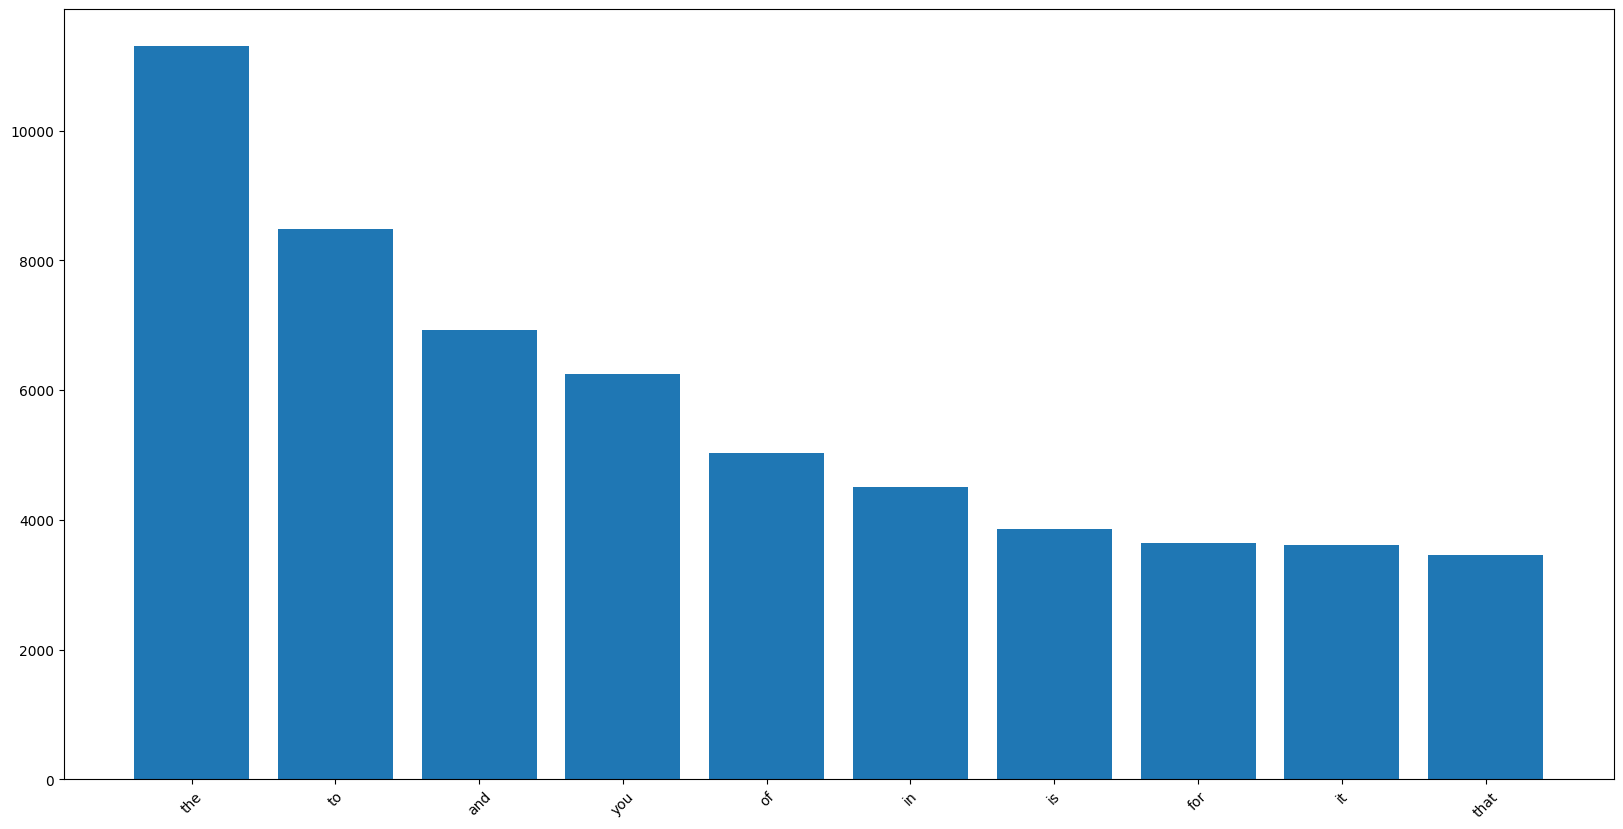

In [161]:
#we can plot the most common words
#we will only plot the top 10 words for readability
word_counts = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(word_counts.index, word_counts.values)
plt.xticks(rotation=45)
plt.show()

#### Question 1: what do you notice about the words in this plot? Is this useful for studying the community?

Answer here: I think from a community analysis perspective, this plot, filled with stop words, offers limited insights into the unique or defining characteristics of the community. These words do not tell us much about the topics of discussion, the interests, or the sentiment of the community members. To gain meaningful insights into the community’s nature or culture, it would be more useful to analyze keywords or phrases that are more content-specific and less grammatically functional.

#### Lemmatization and stopword removal

In [162]:
#lemmatization function from the openclassrooms reading
def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

In [163]:
#we can further process the text by removing stopwords and lemmatizing
mich['lemmatized_text'] = mich['cleaned_text'].apply(lemmatize)

In [164]:
#count vectorizer also has parameters min_df and max_df that can be used to filter out words that are too rare or too common
#min_df=3 means that a word must appear in at least 3 documents to be included, this will remove typos and rare words
#max_df=0.3 means that a word must appear in at most 30% of documents to be included, this will remove corpus-specific stopwords

#we are also able to include n-grams in the count vectorizer
#n-grams are sequences of n words that appear together in the text
#the n-gram_range parameter specifies the minimum and maximum n-gram size to include (so in this case, we are including both unigrams and bigrams)

vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(mich['lemmatized_text'])

In [165]:
#we can see that we filtered out 11000 common words and typos
bag_of_words

<8339x8608 sparse matrix of type '<class 'numpy.int64'>'
	with 126768 stored elements in Compressed Sparse Row format>

In [166]:
#we can repeat the previous code to create a dataframe and count the words
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = bow_df.sum()
word_counts = word_counts.sort_values(ascending=False)
word_counts

not              2863
student          1183
like             1183
people           1124
class             988
                 ... 
club campus         3
open not            3
open source         3
club activity       3
luck search         3
Length: 8608, dtype: int64

In [167]:
#we can convert this to a percentage instead of an absolute count by dividing by the total number of words
word_counts = word_counts / word_counts.sum()

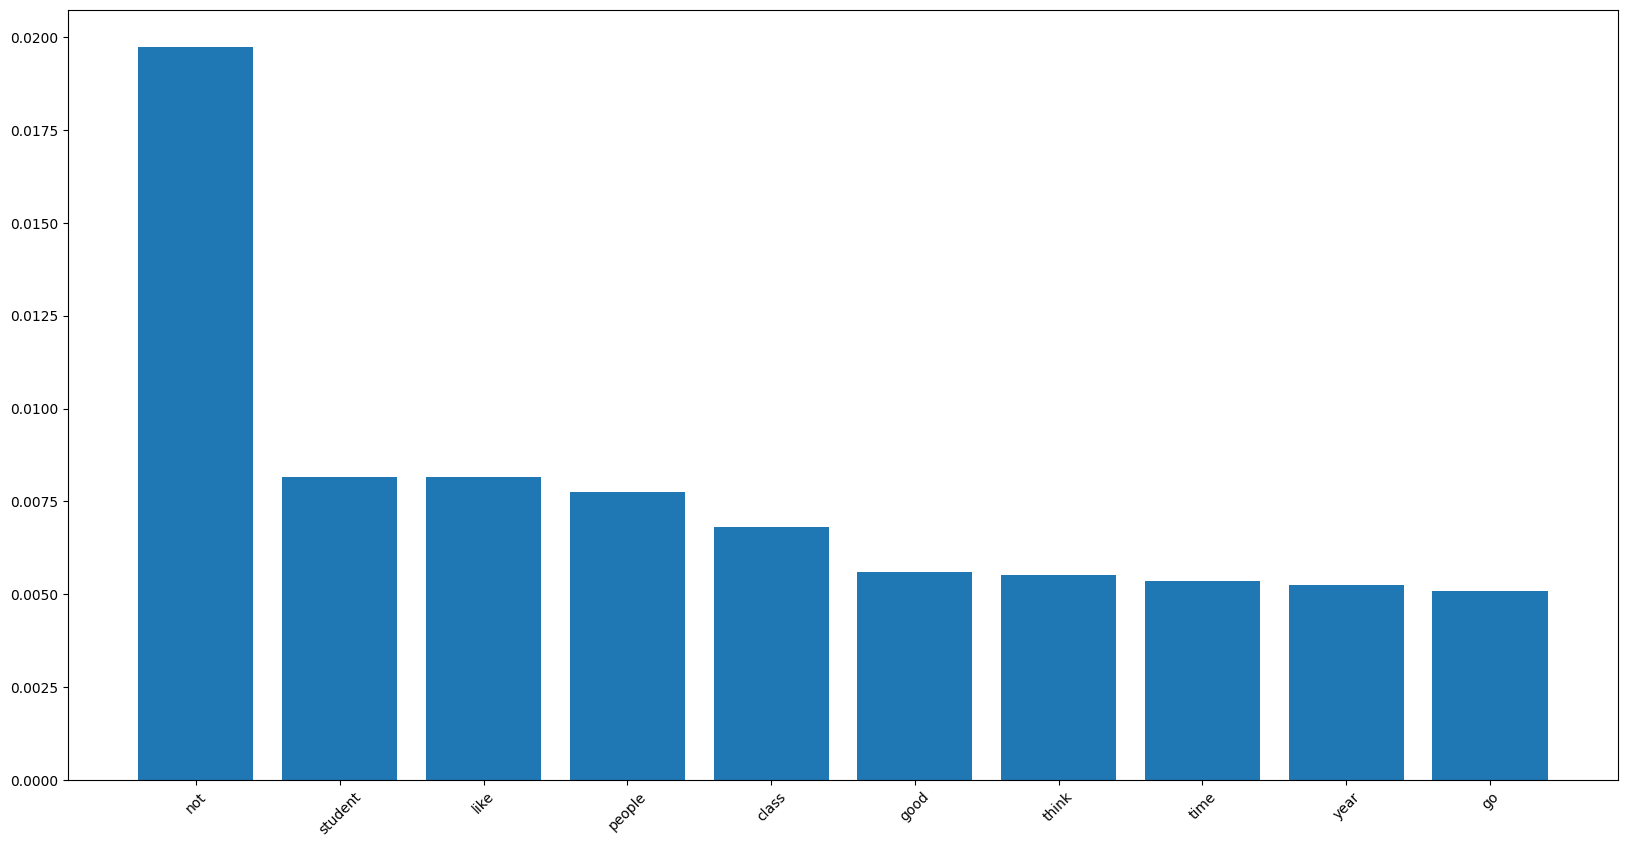

In [168]:
#we can plot the most common words
#we will only plot the top 10 words for readability
plot_list = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

In [169]:
#pandas allows us to access specific words in the series using the index
if "student loan" in word_counts.index:
    print(word_counts["student loan"])
else:
    print("The term 'student loan' does not exist in the data.")

4.1400153180566765e-05


In [170]:
#we can also use a list of words to compare and plot specific words
plot_list=word_counts[["engineering", "football", "research", "scholarship", "campus"]]
plot_list

engineering    0.000938
football       0.000276
research       0.001159
scholarship    0.000566
campus         0.003050
dtype: float64

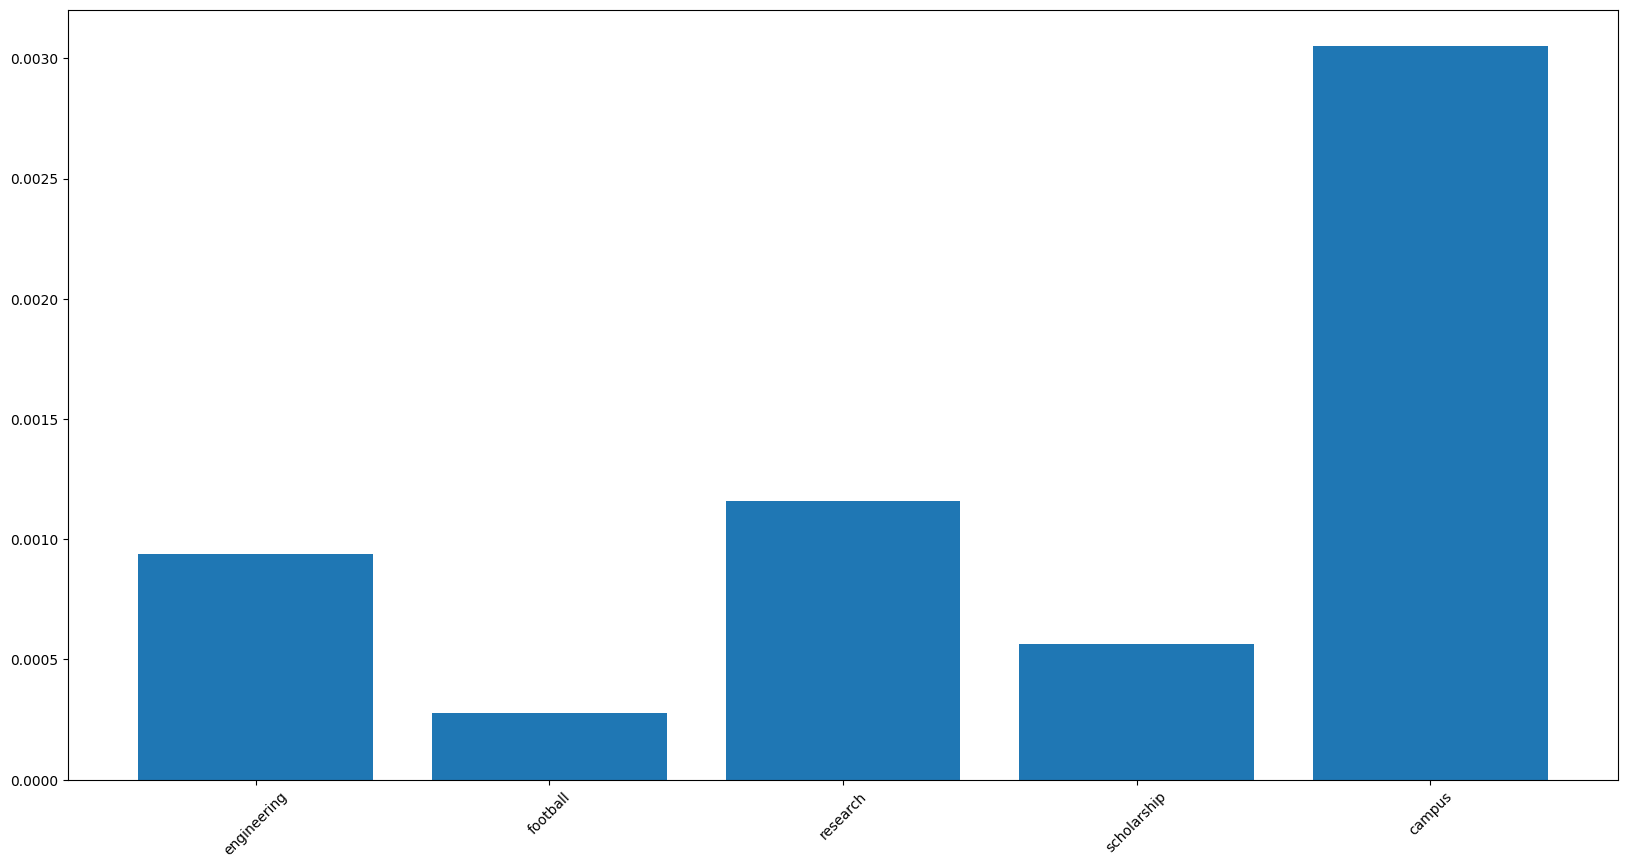

In [171]:

plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

#### Question 2:

In [172]:
#TODO: pick 5are curious about, and plot a bar plot of their freq words that you find interesting or uency in this dataset 

### Problem 2: repeat this process with the Illinois subreddit data (in this directory as "uiuc.csv"). You should not have to change too much in the previous code besides the dataframe path and name. Your notebook should include the two bar graphs including and excluding stopwords. Use the same 5 words and compare their relative frequency between the two subreddits. Discuss any interesting differences you notice in a short markdown cell. 

1.Campus:
In both graphs, “campus” has the highest relative frequency, indicating it’s a central topic of discussion in both university communities. This suggests that discussions around campus life, events, and perhaps campus facilities or issues are prevalent.
2.Scholarship:
“Scholarship” shows a significant presence in both subreddits but is notably more prominent in the UMICH dataset compared to UIUC. This could indicate a higher level of discussion around financial aid, scholarships, or perhaps academic opportunities at UMICH.
3.Research:
The term “research” is more frequently mentioned in the UIUC dataset than in the UMICH dataset. Given that both universities are research-heavy, this might reflect specific priorities or events related to research that were trending or more discussed in the UIUC community during the data collection period.
4.Engineering:
“Engineering” appears relatively more in the UIUC dataset, which could suggest a stronger or more active engineering community or more discussions related to engineering topics at UIUC compared to UMICH.
5.Football:
Interestingly, “football” has a lower relative frequency in both datasets but is slightly higher in the UMICH subreddit. This could be due to seasonal sports events or the particular sports culture at Michigan, which has a strong football following.

In [173]:
uiuc=pd.read_csv("uiuc.csv")


### Problem 3: using the provided combined dataframe, train a logistic regression model using the sklearn Logistic Regression implementation. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html. Create a bag of words table from the combined data, and use that along with the "label" column to train the classifier. Please try this out and be prepared with issues or questions next Monday. We will be discussing in class

In [ ]:
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])

In [ ]:
#clean and lemmatize the data csv
import spacy
import pandas as pd

nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

def clean_and_lemmatize(text):
    doc = nlp(text)
    lemmatized = " ".join([token.lemma_ for token in doc if token.is_alpha])
    return lemmatized

data['clean_text'] = data['text'].apply(clean_and_lemmatize)

In [ ]:
#create a bag of words representation with count vectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(data['clean_text'])
y = data['label']

In [ ]:
#train a logistic regression model using the bag of words features as X and the label column as y
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = LogisticRegression(max_iter=1000)  # Increasing max_iter for convergence
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
#report the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7198476512907321


#### Part 2: hold out part of the dataset using sklearn train_test_split (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Pass in your previously generated bag of words as X and the label column as y. Use only the X_train and y_train for training and hold out the X_test and y_test to score the model on unseen data.

The accuracy of the logistic regression model after using train_test_split to separate the data into training and testing sets is 0.71497, compared to the initial training accuracy of 0.71985. The test accuracy looks slightly lower than the training accuracy, the model performs marginally worse on the test set compared to the training set here. And for the reasons, I think there can be three:

1.Generalization: The slight decrease in accuracy from training to testing suggests that the model may be overfitting to the training data to a small degree. This means it’s slightly less effective at generalizing to new, unseen data.
2.Random Split Impact: The random split of data in train_test_split might lead to a scenario where the test set contains slightly harder or less representative examples than the training set, affecting the model’s ability to predict accurately.
3.Distribution Variance: Although the model was trained to capture the general patterns in the training set, the test set might exhibit variations or nuances not entirely captured during training. This variance can subtly affect model performance, particularly in datasets with diverse or complex features.

In [ ]:
# what is the accuracy of the model? Is it better or worse than previous?Why do you think it has changed? 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)  # Increasing max_iter for convergence
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.714972747675537


#### Part 3: Examine the top features of your model using the following code

In [180]:
#get the coefficients of the model and plot the top 10 most positive and top 10 most negative coefficients
#what do you notice about these words? Are they surprising or expected?


I think the terms are mostly expected and make a lot of sense given the context of each university. They reflect well-known aspects of each university’s identity, including location, popular academic programs, and aspects of student life.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import pandas as pd

feature_names = vectorizer.get_feature_names_out()

coefficients = pd.DataFrame({'feature': feature_names, 'coefficient': model.coef_[0]})

coefficients = coefficients.sort_values('coefficient', ascending=False)

top_10_positive = coefficients.head(10)
top_10_negative = coefficients.tail(10)

print("Top 10 positive coefficients:")
print(top_10_positive)
print("\nTop 10 negative coefficients:")
print(top_10_negative)

Top 10 positive coefficients:
          feature  coefficient
8612          rso     2.461838
4907     illinois     2.313004
10455        uiuc     2.234212
10710      urbana     1.795896
5642          las     1.705319
4905       illini     1.701190
4295     grainger     1.626218
2441     danville     1.508743
1581    champaign     1.478031
865    basketball     1.424356

Top 10 negative coefficients:
        feature  coefficient
8583       ross    -1.617313
416         ann    -1.634700
2341        csg    -1.656106
10681      uofm    -1.695715
3140       eecs    -1.755264
10468        um    -1.822358
10030     texas    -2.008951
10474     umich    -2.287342
3957     fresno    -2.481618
6298   michigan    -3.051160


In [ ]:
#examine these words and see if they make sense. Do they differentiate UIUC from another university?

I believe most of the words make sense and distinctly differentiate UIUC from UMICH by highlighting unique cultural, geographical, and institutional characteristics of each university. For instance, UIUC-related words focus on local geographical terms and specific colleges or aspects of the university; UMICH-related words highlight different key aspects and locales, including prominent departments and the broader community context (e.g., Ann Arbor).

### Problem 4: Train a 10 topic topic model from the UIUC subreddit data using Gensim LDA. (https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html) If you get here before Wednesday 9/11, don't rush to finish, but feel free to continue ahead. We will go through this in class. Print out the top words in each topic, and read through the words for each topic to decide the theme of the topic: remember this is subjective and there are no right or wrong answers. Print out a few comments with high frequencies of each topic and analyze if your topic labels were representative. 

In [ ]:
!pip3 install gensim

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 24.0 MB 12.8 MB/s eta 0:00:01                        | 184 kB 4.7 MB/s eta 0:00:06
     |████████████████████████████████| 14.0 MB 15.8 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [ ]:
import pandas as pd
!pip3 install gensim
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
import nltk

nltk.download('wordnet')

def lemmatize_stemming(text):
    stemmer = PorterStemmer()
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

data = pd.read_csv('uiuc.csv')
data_text = data[['text']]
data_text['index'] = data_text.index

documents = data_text

processed_docs = documents['text'].map(preprocess)
processed_docs[:10]

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


/Users/victoryang/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/victoryang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/var/folders/9r/ff2tm8jj5vlbb2mc9_2xxbg40000gn/T/ipykernel_32930/3778253713.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_text['index'] = data_text.index


0    [professor, lectur, gonna, learn, stuff, ourse...
1    [help, lectur, slide, emb, mistak, make, confu...
2         [tri, email, univers, hous, request, access]
3    [purchas, illini, cash, add, resid, meal, plan...
4                        [thank, suggest, hadn, occur]
5             [lower, limit, illini, cash, leav, year]
6    [polici, fee, inact, account, http, hous, illi...
7    [problem, sure, instal, configur, devic, would...
8                                     [bright, shadow]
9                                           [bookstor]
Name: text, dtype: object

In [ ]:
from gensim.corpora import Dictionary

dictionary = gensim.corpora.Dictionary(processed_docs)
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [ ]:
from gensim.models import LdaModel

num_topics = 10
chunksize = 2000
passes = 20
iterations = 400
eval_every = None

temp = dictionary[0]
id2word = dictionary.id2token

model = LdaModel(
    corpus=bow_corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

topics = model.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.076*"class" + 0.040*"hour" + 0.036*"work" + 0.034*"time" + 0.028*"bike" + 0.023*"stop" + 0.021*"go" + 0.021*"like" + 0.020*"week" + 0.020*"take"')
(1, '0.055*"thank" + 0.041*"student" + 0.022*"money" + 0.021*"park" + 0.019*"univers" + 0.014*"check" + 0.014*"go" + 0.013*"state" + 0.013*"uiuc" + 0.013*"offic"')
(2, '0.138*"http" + 0.083*"illinoi" + 0.040*"weather" + 0.035*"champaign" + 0.025*"urbana" + 0.023*"warn" + 0.020*"card" + 0.018*"credit" + 0.018*"store" + 0.018*"counti"')
(3, '0.049*"student" + 0.042*"campu" + 0.025*"year" + 0.023*"help" + 0.023*"event" + 0.022*"colleg" + 0.021*"school" + 0.019*"experi" + 0.019*"start" + 0.017*"commun"')
(4, '0.029*"right" + 0.028*"clean" + 0.028*"apart" + 0.024*"charg" + 0.019*"email" + 0.019*"month" + 0.018*"leas" + 0.018*"hous" + 0.017*"year" + 0.016*"live"')
(5, '0.070*"water" + 0.044*"like" + 0.030*"post" + 0.024*"safe" + 0.024*"uiuc" + 0.023*"drink" + 0.022*"sound" + 0.022*"walk" + 0.021*"want" + 0.020*"lose"')
(6, '0.049*"think" + 

In [ ]:
topic_labels = [
    "Academic Workload", "University Services", "Local News and Alerts",
    "Campus Life", "Housing Issues", "Safety and Environment",
    "Social Interactions", "Friendship and Social Life", 
    "Academic Guidance", "Campus Facilities"
]

def top_docs_for_topic(topic_id, num_docs):
    docs = []
    for i, doc_topics in enumerate(topics_documents):
        for topic_num, prop_topic in doc_topics:
            if topic_num == topic_id:
                docs.append((i, prop_topic))
    docs = sorted(docs, key=lambda x: x[1], reverse=True)
    return [documents.iloc[i[0]]['text'] for i in docs[:num_docs]]

for topic_id in range(10):
    top_docs = top_docs_for_topic(topic_id, 3)
    print(f"Top documents for Topic {topic_id} ({' '.join(topic_labels[topic_id])}):")
    for doc in top_docs:
        print(doc)
    print("\n---\n")

Top documents for Topic 0 (A c a d e m i c   W o r k l o a d):
I’ll be driving myself up there! But the Amtrak / metro combo with def work too! 

I would offer a ride but I am driving up early and leaving later then the concerts!
love u Miss Sunshine!! 🥹🥹 are you driving the green route this semester?? u make my day every time i ride with u!!
Are you working on campus? You won’t be able to get a SSN without an on-campus job and from my understanding J-1s typically don’t have work authorization (I may be wrong though).

---

Top documents for Topic 1 (U n i v e r s i t y   S e r v i c e s):
I am aware. Your roommate is not the government. If you are really that paranoid, you should not bring up being Uyghur at all, as that would draw attention to it. Let alone try to educate your roommate. Again, it is possible your roommate is aware about the genocide and disagrees, since he has moved internationally, which is very hard to do, to come to this school. He had to have some reason. Why ass

Evaluation of Topic Labels

I personally think more than half of the topic fits quite well, here analyse:

1.Academic Workload (Topic 0): The documents don’t strongly reflect “academic workload” but instead focus on transportation and social interaction related to campus events. This label might not be fully representative.
2.University Services (Topic 1): The discussions revolve around complex issues like personal safety, international student concerns, and financial considerations, which align with university services but also blend into broader social and political discussions.
3.Local News and Alerts (Topic 2): The documents are aligned with this label, mentioning local weather services and health services, which is expected for a local news theme.
4.Campus Life (Topic 3): This label is well-represented with mentions of campus activities, social advice, and the college experience.
5.Housing Issues (Topic 4): The examples provided discuss specific housing-related issues, like amenities and legal rights, fitting the label well.
6.Safety and Environment (Topic 5): While the documents discuss safety and environmental control within dorm settings, the label could be more precisely tailored to reflect personal health and indoor environment concerns.
7.Social Interactions (Topic 6): This label is vaguely represented. Discussions seem to touch on economic aspects and personal experiences which are not purely social interactions but have a broader context.
8.Friendship and Social Life (Topic 7): This is aptly labeled, with documents focusing on making friends and socializing on campus, which is exactly what the label suggests.
9.Academic Guidance (Topic 8): The documents discuss academic advice and decision-making, fitting well with the label.
10.Campus Facilities (Topic 9): The documents talk about housing and in-person class settings, which can be better labeled to reflect broader campus resource discussions rather than just facilities.

And I think there can be a few ways to improvement
1.Refine Topic Labels: Adjust the labels to better capture the essence of the discussions. For example, Topic 0 could be relabeled as “Campus Transportation and Events” instead of “Academic Workload.”
2.Increase Model Granularity: Adjust the number of topics or the parameters of the LDA model to better differentiate between topics that may be overlapping or too broad.
3.Topic Coherence and Segmentation: Use coherence scores to evaluate the quality of topics and identify ways to split or merge topics based on their coherence and distinction.
4.Deeper Text Preprocessing: Enhance text preprocessing steps to remove irrelevant words or phrases that might be skewing the topic modeling results. Incorporate more sophisticated NLP techniques like named entity recognition or dependency parsing to capture more nuanced thematic elements.